# Autoencoders

"Autoencoding" is a data compression algorithm where the compression and decompression functions are 1) data-specific, 2) lossy, and 3) learned automatically from examples rather than engineered by a human. 

Additionally, in almost all contexts where the term "autoencoder" is used, the compression and decompression functions are implemented with neural networks.

In this assignment, you will learn to implement simple and convolutional autoencoders as well as see practical demonstration in denoising data.


##Step 0: Import Libraries

Import the necesary libraries for this assignment.

In [44]:
import numpy as np
import keras
from keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt

## Step 1 [2 points]: Import Data
We will be using the [MNIST](https://keras.io/api/datasets/mnist/) dataset for this programming assignment.
Load mnist data from the keras datasets library and load the x_train and x_test variables.


In [ ]:

##### INPUT CODE HERE (~1 lines of code) ######

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

###############################################

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)

## Step 2 [8 points]: Preprocess Data

Normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.


In [ ]:
##### INPUT CODE HERE (~4 lines of code) ######

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

###############################################

print(x_train.shape)
print(x_test.shape)

assert x_train.shape == (60000, 784)
assert x_test.shape == (10000, 784)

assert len([i for i in x_train[0] if i > 1 and i<0]) == 0
assert len([i for i in x_test[0] if i > 1 and i<0]) == 0


(60000, 784)
(10000, 784)


## Step 3 [20 points]: Setup Autoencoder

Setup an autoencoder with encoding and decoding layers having encoding dimension of 32. Use relu activation for the encoding layer and sigmoid activation for the decoding layer.

Useful Links:
1. [Layers](https://keras.io/api/layers/core_layers/dense/)
2. [Model](https://keras.io/api/models/model/)

In [ ]:
encoding_dim = 32
input_img = keras.Input(shape=(784,))

################ INPUT CODE HERE (~3 lines of code) #####################
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)


#########################################################################

## Step 3 [20 points]: Run Autoencoder

First, [configure](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) the autoencoder model to use a per-pixel [binary crossentropy](https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class) loss, and the Adam optimizer:

In [ ]:
################ INPUT CODE HERE (~1 lines of code) #####################
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#########################################################################

Next, [train](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) the autoencoder for 50 epochs and batch size 256:

In [ ]:
################ INPUT CODE HERE (~1 lines of code) #####################

autoencoder.fit(x_train, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

#########################################################################

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0927 - val_loss: 0.0915
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0927 - val_loss: 0.0916
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0926 - val_loss: 0.0916
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0926 - val_loss: 0.0916
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 7/50
235/235 [==============================] - 2s 11ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0926 - val_lo

Both the training and validation loss should converge at a value <= 0.1


Now find the decoded versions of the x_test values, i.e. [run](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict) your model on x_test and store the outputs in decoded_imgs.

In [ ]:
################ INPUT CODE HERE (~1 lines of code) #####################

decoded_imgs = autoencoder.predict(x_test)

#########################################################################

##Step 5: Visualize Results:

Here, you can visualize that the decoded output of your x_test data set along with the original images. 

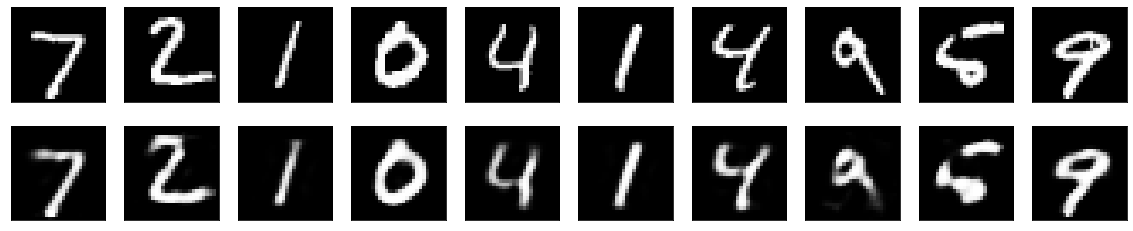

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The top row is the original digits, and the bottom row is the reconstructed digits. We are losing quite a bit of detail with this basic approach.


---



# Denoising using Convolutional Autoencoders:
Instead of limiting yourselves to one layer, now experiment using a stack of layers.

Since the inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders. In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better.

You will then put the convolutional autoencoder to work on an image denoising problem. It's simple: the autoencoder should map noisy digits images to clean digits images.


## Step 6 [10 points]: Load Data:

Load data and normalize all values between 0 and 1 but this time, you do not need to flatten the 28x28 images.

In [45]:
################ INPUT CODE HERE (~5 lines of code) #####################
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#########################################################################

## Step 7: Generate Synthetic Data:

We generate synthetic noisy digits by simply applying a gaussian noise matrix and clip the images between 0 and 1.


In [46]:
noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 28, 28)
(10000, 28, 28)


Here is how the the noisy image data is looking:

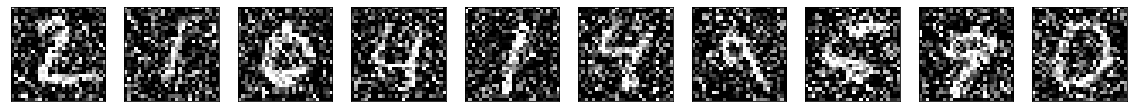

In [47]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Step 8 [30 points]: Setup Convolutional Autoencoder :

This time you will write code to set up an autoencoder with convolutional layers. You can experiment with various designs but we recommend:

1. Let the input size of images be 28x28x1.
2. Convolutional layer with 32 filters of kernel size 3x3 and same padding on all edges.
3. Max pool layer with kernel 2x2 and same padding on all edges.
4. Convolutional layer with 32 filters of kernel size 3x3 and same padding on all edges.
5. Max pool layer with kernel 2x2 and same padding on all edges.

At this point the representation is (7, 7, 32)

6. Convolutional layer with 32 filters of kernel size 3x3 and same padding on all edges.
7. Up sampling layer with kernel 2x2.
8. Convolutional layer with 32 filters of kernel size 2x2 and same padding on all edges.
9. Up sampling layer with kernel 2x2.
10. Convolutional layer with 1 filter of kernel size 3x3 and same padding on all edges.

Useful Links:

1. [Convolutional layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
2. [Max Pool layers](https://keras.io/api/layers/pooling_layers/max_pooling2d/)
3. [Up sampling](https://keras.io/api/layers/reshaping_layers/up_sampling2d/)




In [48]:

input_img = keras.Input(shape=(28, 28, 1))

################ INPUT CODE HERE (~9 lines of code) #####################


x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2D(32, (2,2), padding='same')(x)
x = layers.UpSampling2D(size=(2, 2))(x)
decoded = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)
#########################################################################


In [52]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

## Step 9 [10 points]: Run Autoencoder

Next, train the autoencoder for 10 epochs and batch size 128.

This step could take some time, about 2 minutes per epoch.

In [54]:
################ INPUT CODE HERE (~1 lines of code) #####################

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test)
               )

#########################################################################

Epoch 1/10
469/469 [==============================] - 122s 261ms/step - loss: 0.1267 - val_loss: 0.0823
Epoch 2/10
469/469 [==============================] - 121s 258ms/step - loss: 0.1112 - val_loss: 0.0818
Epoch 3/10
469/469 [==============================] - 121s 259ms/step - loss: 0.1089 - val_loss: 0.0806
Epoch 4/10
469/469 [==============================] - 121s 257ms/step - loss: 0.1071 - val_loss: 0.0800
Epoch 5/10
469/469 [==============================] - 120s 256ms/step - loss: 0.1057 - val_loss: 0.0794
Epoch 6/10
469/469 [==============================] - 120s 255ms/step - loss: 0.1045 - val_loss: 0.0793
Epoch 7/10
469/469 [==============================] - 120s 256ms/step - loss: 0.1037 - val_loss: 0.0796
Epoch 8/10
469/469 [==============================] - 120s 255ms/step - loss: 0.1029 - val_loss: 0.0787
Epoch 9/10
469/469 [==============================] - 120s 255ms/step - loss: 0.1023 - val_loss: 0.0783
Epoch 10/10
469/469 [==============================] - 120s 256m

Both the training and validation loss should converge at a value <= 0.1.

If you are experimenting with different network configurations, make sure your losses are not greater than expected.

Now find the decoded versions of the x_test_noisy values, i.e. run your model on x_test_noisy and store the outputs in pred_imgs.


In [55]:
################ INPUT CODE HERE (~1 lines of code) #####################

pred_imgs = autoencoder.predict(x_test_noisy)

#########################################################################

## Step 10: Visualize Results

Run the cell below to see how your network has performed.

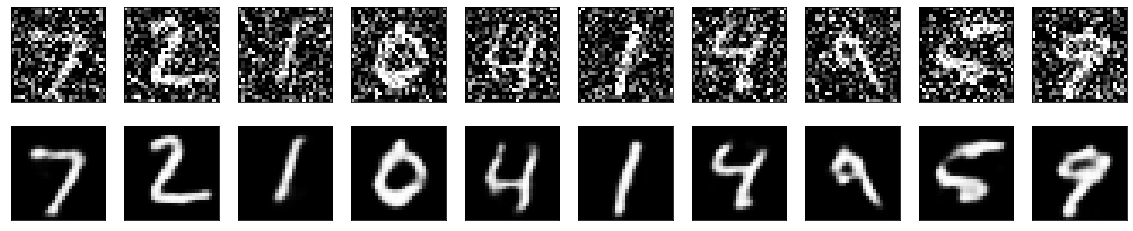

In [56]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Top, the noisy digits fed to the network, and bottom, the digits are reconstructed by the network.

It seems to work pretty well. If you scale this process to a bigger convnet, you can start building document denoising or audio denoising models.


---

